In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("carprices.csv")
df.head(2)

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car Model      13 non-null     object
 1   Mileage        13 non-null     int64 
 2   Sell Price($)  13 non-null     int64 
 3   Age(yrs)       13 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 548.0+ bytes


In [7]:
df.describe()

,Mileage,Sell Price($),Age(yrs)
count,13.000000,13.000000,13.000000
mean,60884.615385,26023.076923,5.307692
std,19185.665055,8003.661021,1.652504
min,22500.000000,12000.000000,2.000000
25%,52000.000000,20000.000000,5.000000
50%,59000.000000,26100.000000,5.000000
75%,72000.000000,32000.000000,6.000000
max,91000.000000,40000.000000,8.000000


In [9]:
df["Car Model"].value_counts()

Car Model
BMW X5                   5
Audi A5                  4
Mercedez Benz C class    4
Name: count, dtype: int64

In [13]:
df["Car Model"]=df["Car Model"].replace(
    {
        "BMW X5":0,
        "Audi A5":1,
        "Mercedez Benz C class":2
        
    }
)
df["Car Model"].value_counts()

Car Model
0    5
1    4
2    4
Name: count, dtype: int64

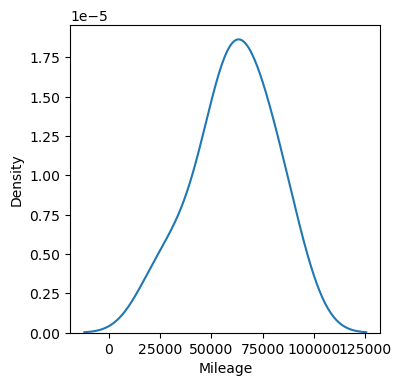

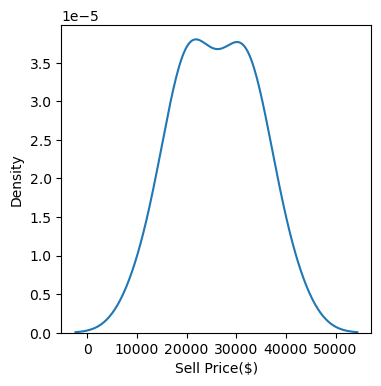

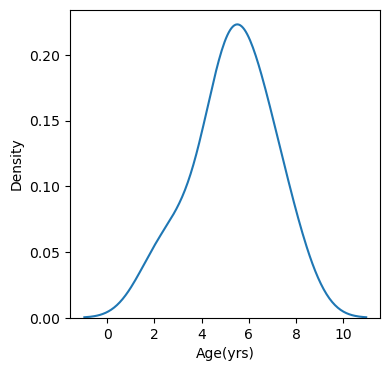

In [17]:
col=["Mileage","Sell Price($)","Age(yrs)"]
for c in col:
    plt.figure(figsize=(4,4))
    sns.kdeplot(df[c])
    plt.show()

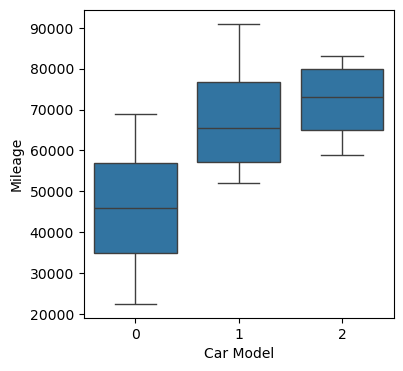

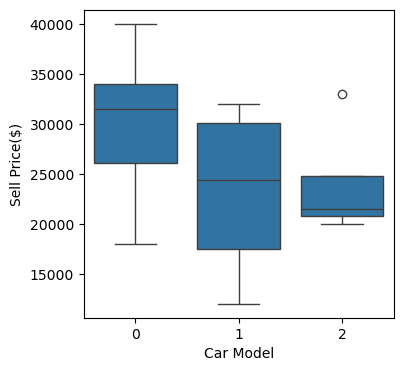

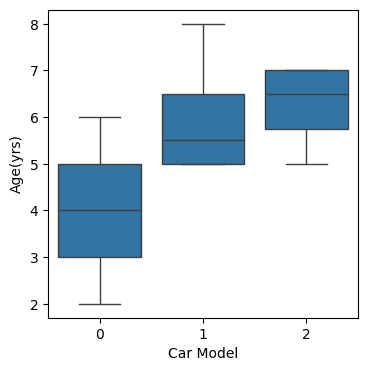

In [23]:
col=["Mileage","Sell Price($)","Age(yrs)"]
for c in col:
    plt.figure(figsize=(4,4))
    sns.boxplot(data=df,y=c,x="Car Model")
    plt.show()

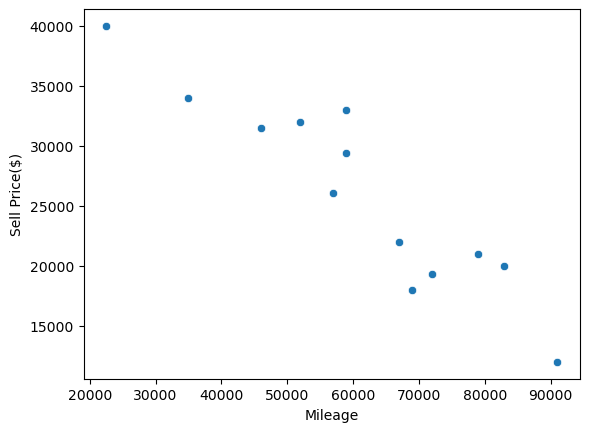

In [25]:
sns.scatterplot(data=df,x="Mileage",y="Sell Price($)")
plt.show()

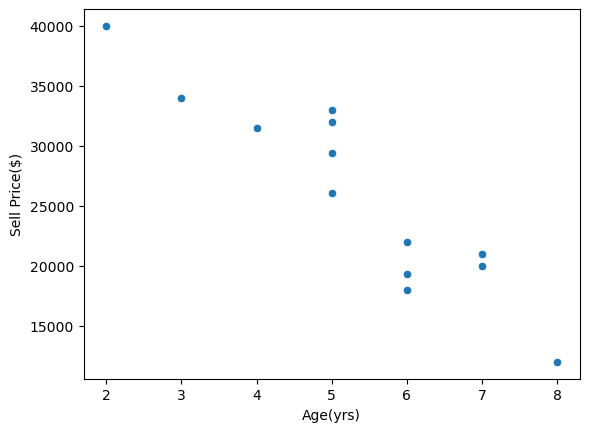

In [33]:
sns.scatterplot(data=df,x="Age(yrs)",y="Sell Price($)")
plt.show()

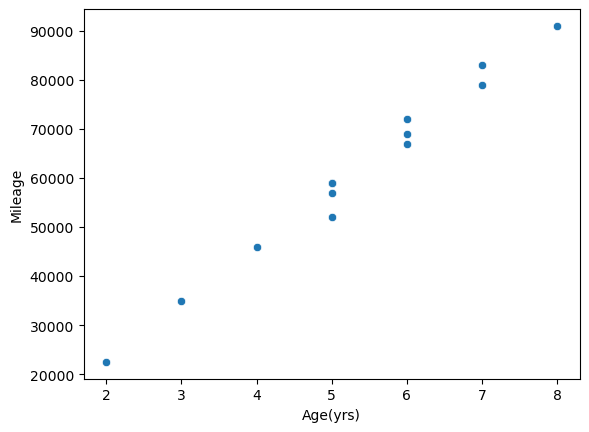

In [35]:
sns.scatterplot(data=df,x="Age(yrs)",y="Mileage")
plt.show()

<Axes: >

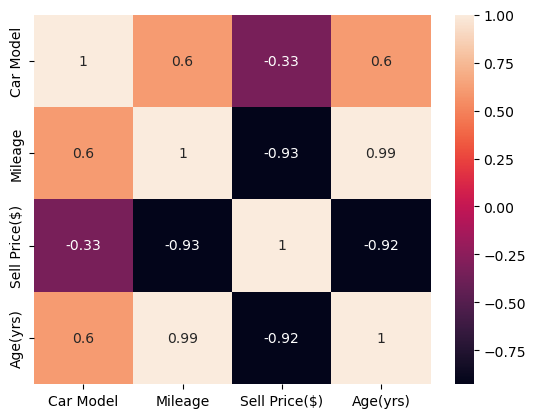

In [37]:
sns.heatmap(df.corr(),annot=True) # multicollinearity

In [39]:
features=df.drop("Sell Price($)",axis=1)
target=df["Sell Price($)"]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,random_state=10,test_size=0.15)
print(f"Training data : {xtrain.shape, ytrain.shape}" )
print(f"Testing data : {xtest.shape, ytest.shape}" )

Training data : ((11, 3), (11,))
Testing data : ((2, 3), (2,))


In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [45]:
model=DecisionTreeRegressor()

In [51]:
cv=cross_val_score(model,features,target,cv=4)
cv.mean()

-3.0643417164531344

In [53]:


model=RandomForestRegressor()
cv=cross_val_score(model,features,target,cv=4)
cv.mean()

-1.0694422600443805

In [55]:
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)

In [59]:
from sklearn.metrics import mean_absolute_error,r2_score # using mean_absolute_error because outliers are there
mae=mean_absolute_error(ytest,ypred)
r2=r2_score(ytest,ypred)
print("Mean Absolute error i.e. error in prediction of each point : ",mae)
print("R2 Score : ",r2)

Mean Absolute error i.e. error in prediction of each point :  3930.5
R2 Score :  0.7370416812527714
